# Heritability of Opioid Addiction: LDSC
**Author**: Jesse Marks <br>
**GitHub Issue:** [#126](https://github.com/RTIInternational/bioinformatics/issues/126) <br>
**Project Charge**: fwGWAS opioid project <br> 

For one of the RFAs that we brainstormed earlier this week (https://grants.nih.gov/grants/guide/rfa-files/RFA-DA-20-006.html), we will need to know the heritability of opioid addiction (OA) and its genetic correlation with FTND. As done elsewhere, this will need to focus on the EUR-specific analyses from GitHub Issues #55 and #60 . Please charge any work related to this task to the fwGWAS opioids project.

We are going to utilize the [LD score regression pipeline](https://github.com/RTIInternational/ld-regression-pipeline) that Alex Waldrop developed to perform LD score regression. 
<br><br>

The opioid meta-analyses and smoking results from GSCAN are located on S3:

* FOU: `s3://rti-midas-data/studies/ngc/meta/070/processing/fou/`
* OAall: `s3://rti-midas-data/studies/ngc/meta/082/processing/oaall/`
* OAexp: `s3://rti-midas-data/studies/ngc/meta/060/processing/oaexp/`
* GSCAN Smoking: 
    * `s3://rti-nd/LDSC/GSCAN/CigarettesPerDay.txt.gz`
    * `s3://rti-nd/LDSC/GSCAN/AgeOfInitiation.txt.gz`
    * `s3://rti-nd/LDSC/GSCAN/SmokingCessation.txt.gz`
    * `s3://rti-nd/LDSC/GSCAN/SmokingInitiation.txt.gz`


**Note**: I got the `N`'s for opioid data from Nathan Gaddis in [this GitHub comment](https://github.com/RTIInternational/bioinformatics/issues/103#issuecomment-520503922).

**Note**: GSCAN reference and alternative allele coding is backwards, so make note of this when specifying those columns in the phenotype Excel file.

### Workflow guideline
 1. Create Excel phenotype file locally then upload to EC2 instance
 2. Clone https://github.com/RTIInternational/ld-regression-pipeline
 3. Then edit full_ld_regression_wf_template.json to include the reference data of choice
 4. Lastly use dockerized tool to finish filling out the json file that will be input for workflow
 
### workflow ID numbers:
Record the workflow ID number of each run. Get this ID by looking at the log file, example: <br>
`/shared/jmarks/bin/cromwell/cromwell-workflow-logs/workflow.cffd947c-9345-41f1-a146-3e3454404fa3.log`
#### FTND vs Opioid & GSCAN
`3585b622-dc61-43dc-9af5-7a31092d6878`

#### OAall vs GSCAN
`3b79148a-6c17-4c14-b3b1-4b176915e9e9`

#### OAexp vs GSCAN
`75a066f2-8171-4089-a951-ef18bb7b3216`

#### FOU vs GSCAN
`6c6ce39f-35a9-45b7-85b6-93b5fce7a579`

## FTND vs Opioid & GSCAN (003)

### Create WorkFlow inputs
Here is an example entry in the Excel Phenotype File:

**trait	plot_label	sumstats_path	pmid	category	sample_size	id_col	chr_col	pos_col	effect_allele_col	ref_allele_col	effect_col	pvalue_col	sample_size_col	effect_type	w_ld_chr**
```
COPDGWAS Hobbs et al.	COPD	s3://rti-nd/LDSC/COPDGWAS_HobbsEtAl/modGcNoOtherMinMissSorted.withchrpos.txt.gz	28166215	Respiratory	51772	3	1	2	4	5	10	12		beta	s3://clustername--files/eur_w_ld_chr.tar.bz2
```

In [ ]:
### EC2 ### 
## phenotype file preparation ## 


## OAexp 
cd /shared/jmarks/proj/heroin/ldsc/003/processing/oaexp
# create merged summary stats (extract only necessary columns)
for chr in {1..22}; do
    aws s3 cp s3://rti-midas-data/studies/ngc/meta/060/processing/oaexp/coga+decode+yale_penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.gz .
done
    
zcat coga+decode+yale_penn.ea.chr1.maf_gt_0.01.rsq_gt_0.3.gz | \
    cut  -f1,2,3,4,5,6,8 > oaexp_060.txt 
for chr in {2..22}; do
    zcat coga+decode+yale_penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.gz |\
        tail -n +2 | cut -f1,2,3,4,5,6,8 >> oaexp_060.txt 
done &

gzip oaexp_060.txt 
# upload to s3
file=oaexp_060.txt.gz
aws s3 cp $file s3://rti-nd/LDSC/opioid_oaexp/$file


## FOU
cd /shared/jmarks/proj/heroin/ldsc/003/processing/fou
# create merged summary stats (extract only necessary columns)
for chr in {1..22}; do
    aws s3 cp s3://rti-midas-data/studies/ngc/meta/070/processing/fou/alive+cats+cogend+start+uhs1-4+vidus+yale-penn.ea.fou.chr$chr.maf_gt_0.01.rsq_gt_0.3.gz . --quiet 
done &
    
zcat alive+cats+cogend+start+uhs1-4+vidus+yale-penn.ea.fou.chr1.maf_gt_0.01.rsq_gt_0.3.gz | \
    cut  -f1,2,3,4,5,6,8 > fou_070.txt 
for chr in {2..22}; do
    zcat alive+cats+cogend+start+uhs1-4+vidus+yale-penn.ea.fou.chr$chr.maf_gt_0.01.rsq_gt_0.3.gz |\
        tail -n +2 | cut -f1,2,3,4,5,6,8 >> fou_070.txt 
done &

# upload to s3
aws s3 cp fou_070.txt.gz s3://rti-nd/LDSC/opioid_fou/fou_070.txt.gz


## OAall
cd /shared/jmarks/proj/heroin/ldsc/003/processing/oaall
# create merged summary stats (extract only necessary columns)
for chr in {1..22}; do
    aws s3 cp s3://rti-midas-data/studies/ngc/meta/082/processing/oaall/cats+coga+decode+kreek+uhs+vidus+yale-penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.gz . --quiet 
done &
    
zcat cats+coga+decode+kreek+uhs+vidus+yale-penn.ea.chr1.maf_gt_0.01.rsq_gt_0.3.gz | \
    cut  -f1,2,3,4,5,6,8 > oaall_082.txt 
for chr in {2..22}; do
    zcat cats+coga+decode+kreek+uhs+vidus+yale-penn.ea.chr$chr.maf_gt_0.01.rsq_gt_0.3.gz |\
        tail -n +2 | cut -f1,2,3,4,5,6,8 >> oaall_082.txt 
done &

# upload to s3
file=oaall_082.txt.gz
aws s3 cp $file s3://rti-nd/LDSC/opioid_oaall/$file

In [ ]:
### EC2 ###
## clone ldsc github repo ##
# enter compute node and use screen tool
screen 
qrsh -l h=ip-172-31-17-75

# clone github repo
cd /shared/jmarks/proj/heroin/ldsc/003
git clone https://github.com/RTIInternational/ld-regression-pipeline
    
# edit file-input json
cd ld-regression-pipeline
mkdir workflow_inputs
cp json_input/full_ld_regression_wf_template.json workflow_inputs
cd workflow_inputs

## vim edit file (see README.md at https://github.com/RTIInternational/ld-regression-pipeline)

In [ ]:
### local ###

## edit phenotype file and upload to EC2 instance
scp -i ~/.ssh/gwas_rsa *xlsx ec2-user@3.221.213.211:/shared/jmarks/projects/nicotine/ldsc/003/ld-regression-pipeline/workflow_inputs

In [ ]:
### EC2 ###

# create final workflow input (a json file)
docker run -v /shared/jmarks/proj/heroin/ldsc/003/ld-regression-pipeline/workflow_inputs:/data/ \
    rticode/generate_ld_regression_input_json:1ddbd682cb1e44dab6d11ee571add34bd1d06e21 \
    --json-input /data/full_ld_regression_wf_template.json \
    --pheno-file /data/20190814_opioid_ldsc_phenotypes_local.xlsx >\
        /shared/jmarks/proj/heroin/ldsc/003/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json

### Run Analysis Workflow
Note that I `qrsh` into a compute node—r5.xlarge—when I run the workflow. It is important to enter screen so that if something happens to the terminal window during the processing the workflow will continue to run.

In [ ]:
### EC2 ###

## zip appropriate files 
# Change to directory immediately above ld-regression-pipeline
cd /shared/jmarks/proj/heroin/ldsc/003/ld-regression-pipeline
cd ..
# Make zipped copy of repo somewhere
zip --exclude=*var/* --exclude=*.git/* -r \
    /shared/jmarks/proj/heroin/ldsc/003/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip \
    ld-regression-pipeline

## download cromwell and the config file, if necessary
cd /shared/jmarks/bin/cromwell
aws s3 cp s3://rti-cromwell-output/cromwell-config/cromwell_default_genomics_queue.conf .
#wget https://github.com/broadinstitute/cromwell/releases/download/44/cromwell-44.jar

## run ldsc workflow on AWS EC2 instance
java -Dconfig.file=/shared/jmarks/bin/cromwell/cromwell_default_genomics_queue.conf \
    -jar cromwell-44.jar \
    run /shared/jmarks/proj/heroin/ldsc/003/ld-regression-pipeline/workflow/full_ld_regression_wf.wdl \
    -i /shared/jmarks/proj/heroin/ldsc/003/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json \
    -p /shared/jmarks/proj/heroin/ldsc/003/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip

### Copy Workflow Results to Local


In [ ]:
scp -r -i ~/.ssh/gwas_rsa ec2-user@54.84.72.140:/shared/jmarks/proj/heroin/ldsc/003/ld-regression-pipeline/workflow_inputs .

### LDHub
**Note**: We did not use LDHub for this case. All of our data was inhouse.


```
Important notes for your uploaded file:

1. To save the uploading time, LD Hub only accepts zipped files as input (e.g. mydata.zip).

2. Please check that there is ONLY ONE plain TXT file (e.g. mydata.txt) in your zipped file.

3. Please make sure you do NOT zip any folder together with the plain txt file (e.g. /myfolder/mydata.txt), otherwise you will get an error: [Errno 2] No such file or directory

4. Please do NOT zip multiple files (e.g. zip mydata.zip file1.txt file2.txt ..) or zip a file with in a folder (e.g. zip mydata.zip /path/to/my/file/mydata.txt).

5. Please keep the file name of your plain txt file short (less than 50 characters), otherwise you may get an error: [Errno 2] No such file or directory

6. Please zip your plain txt file using following command (ONE file at a time):

For Windows system: 1) Locate the file that you want to compress. 2) Right-click the file, point to Send to, and then click Compressed (zipped) folder.

For Linux and Mac OS system: zip mydata.zip mydata.txt

Reminder: for Mac OS system, please do NOT zip you file by right click mouse and click "Compress" to zip your file, this will automatically create a folder called "__MACOS". You will get an error: [Errno 2] No such file or directory.

Upload the trait of interest
To save your upload time, we highly recommend you to use the SNP list we used in LD Hub to reduce the number of SNPs in your uploaded file. Click here to download our SNP list (w_hm3.noMHC.snplist.zip).

Please upload the zipped file you just created. Click here to download an input example.
```

In [ ]:
### EC2 ###

## Download outputs for each ref chr from rftm_sumstats step
#cd /shared/jmarks/hiv/ldsc/ldhub
#aws s3 sync s3://rti-cromwell-output/cromwell-execution/full_ld_regression_wf/ed5747ed-ccbe-4bc9-bb44-1f2d750a27eb/call-munge_ref/MUNGE_REF_WF.munge_sumstats_wf/e6c9491a-ca22-4ca0-8ad6-79d2b13a6dbe/call-munge_chr_wf/ .
#    
#mv  */MUNGE_CHR.munge_sumstats_chr_wf/*/call-rfmt_sumstats/hiv_acquisition_1df_meta_analysis_uhs1-4_ea+vidus_ea+wihs1_ea.chr*.exclude_singletons.1df.standardized.phase3ID.munge_ready.txt .
#
## Concat into single file
#cat hiv_acquisition_1df_meta_analysis_uhs1-4_ea+vidus_ea+wihs1_ea.chr1.exclude_singletons.1df.standardized.phase3ID.munge_ready.txt >\
#    hiv016_ld_hub_with_pvalues.txt
#for chr in {2..22}
#do
#    tail -n +2  hiv_acquisition_1df_meta_analysis_uhs1-4_ea+vidus_ea+wihs1_ea.chr$chr.exclude_singletons.1df.standardized.phase3ID.munge_ready.txt >>\
#        hiv016_ld_hub_with_pvalues.txt
#done
#
#
## Remove unnecessary columns (need snpID, A1, A2, Beta, Pvalue)
#cat hiv016_ld_hub_with_pvalues.txt | cut -f 1,4,5,6,7 > tmp && mv tmp hiv016_ld_hub_with_pvalues.txt
#
## Add sample size column (sample = 46213.00)
#cat hiv016_ld_hub_with_pvalues.txt | awk -v OFS="\t" -F"\t" '{print $1,$2,$3,$4,"4664.000",$5}' > hiv016_ld_hub.txt
#
## Use vi to change column names to be:
#snpid A1 A2 BETA N P-value
#

In [ ]:
### EC2 ###
## enter interactive mode
#docker run -it -v"/shared/jmarks/proj/heroin/ldsc/001/plot:/data/" \
#    rticode/plot_ld_regression_results:1ddbd682cb1e44dab6d11ee571add34bd1d06e21 /bin/bash
#    
#Rscript /opt/plot_ld_regression/plot_ld_regression_results.R  \
#    --input_file 20190812_ftnd_opioid_rg_plot_table.csv \
#    --output_file 20190812_ftnd_opioid_rg_plot.pdf  \
#    --comma_delimited
#    --group_order_file ftnd_opioid_rg_plot_order.csv

In [ ]:
#Rscript /opt/plot_ld_regression/plot_ld_regression_results.R \
#    --input_file ftnd_revised_plot_table_7-29-19.csv \
#    --output_file ftnd_ld_regression_results_7-29-19.pdf \
#    --comma_delimited

### View Plot

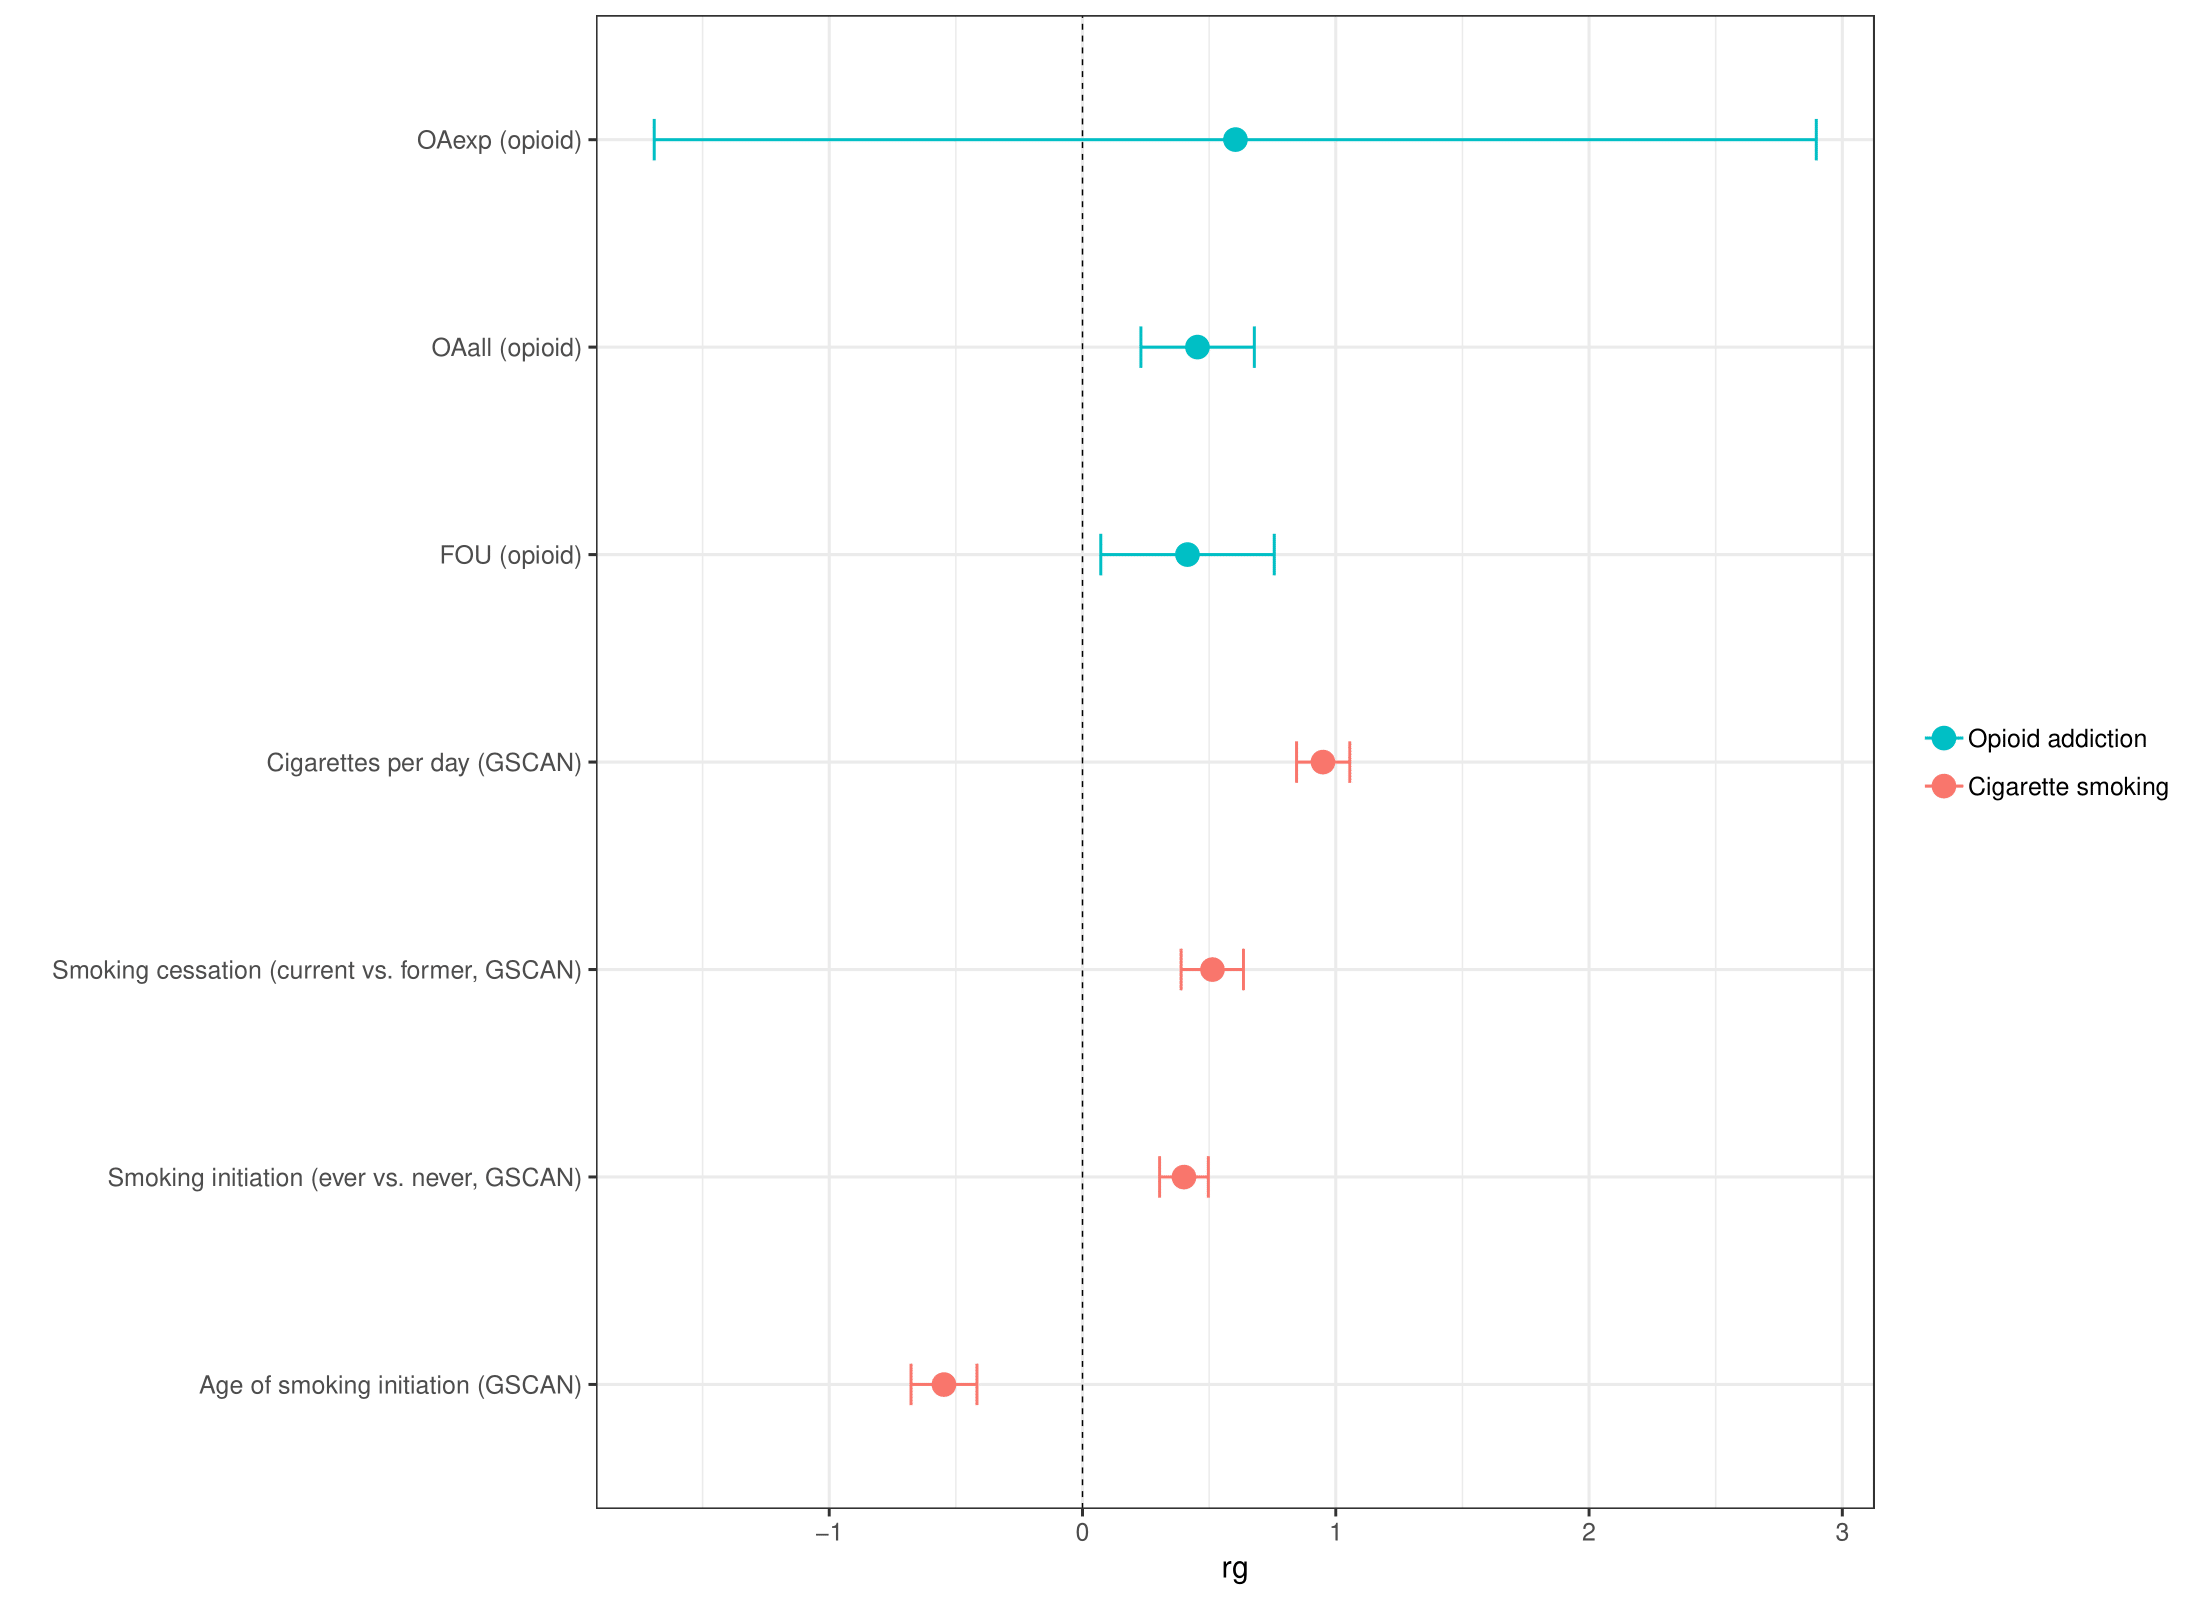

In [3]:
from IPython.display import Image
Image("C://Users/jmarks/OneDrive - Research Triangle Institute/Projects//heroin/ldsc/003/plot/ftnd_test.ld_regression_results-1.png")

## OAall vs GSCAN (004)

In [ ]:
### EC2 ###
## clone ldsc github repo ##
# enter compute node and use screen tool
screen 
qrsh -l h=ip-172-31-17-75

# clone github repo
cd /shared/jmarks/proj/heroin/ldsc/004
git clone https://github.com/RTIInternational/ld-regression-pipeline
    
# edit file-input json
cd ld-regression-pipeline
mkdir workflow_inputs
cp json_input/full_ld_regression_wf_template.json workflow_inputs
cd workflow_inputs

## vim edit file (see README.md at https://github.com/RTIInternational/ld-regression-pipeline)

In [ ]:
### local ###

## edit phenotype file and upload to EC2 instance
scp -i ~/.ssh/gwas_rsa *xlsx ec2-user@3.221.213.211:/shared/jmarks/projects/nicotine/ldsc/004/ld-regression-pipeline/workflow_inputs

In [ ]:
### EC2 ###

# create final workflow input (a json file)
docker run -v /shared/jmarks/proj/heroin/ldsc/004/ld-regression-pipeline/workflow_inputs:/data/ \
    rticode/generate_ld_regression_input_json:1ddbd682cb1e44dab6d11ee571add34bd1d06e21 \
    --json-input /data/full_ld_regression_wf_template.json \
    --pheno-file /data/20190814_opioid_ldsc_phenotypes_local.xlsx >\
        /shared/jmarks/proj/heroin/ldsc/004/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json

### Run Analysis Workflow
Note that I `qrsh` into a compute node—r5.xlarge—when I run the workflow. It is important to enter screen so that if something happens to the terminal window during the processing the workflow will continue to run.

In [ ]:
### EC2 ###

## zip appropriate files 
# Change to directory immediately above ld-regression-pipeline
cd /shared/jmarks/proj/heroin/ldsc/004/ld-regression-pipeline
cd ..
# Make zipped copy of repo somewhere
zip --exclude=*var/* --exclude=*.git/* -r \
    /shared/jmarks/proj/heroin/ldsc/004/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip \
    ld-regression-pipeline

## download cromwell and the config file, if necessary
cd /shared/jmarks/bin/cromwell
#aws s3 cp s3://rti-cromwell-output/cromwell-config/cromwell_default_genomics_queue.conf .
#wget https://github.com/broadinstitute/cromwell/releases/download/44/cromwell-44.jar

## run ldsc workflow on AWS EC2 instance
java -Dconfig.file=/shared/jmarks/bin/cromwell/cromwell_default_genomics_queue.conf \
    -jar cromwell-44.jar \
    run /shared/jmarks/proj/heroin/ldsc/004/ld-regression-pipeline/workflow/full_ld_regression_wf.wdl \
    -i /shared/jmarks/proj/heroin/ldsc/004/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json \
    -p /shared/jmarks/proj/heroin/ldsc/004/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip

### Copy Workflow Results to Local

In [ ]:
scp -r -i ~/.ssh/gwas_rsa ec2-user@54.84.72.140:/shared/jmarks/proj/heroin/ldsc/004/ld-regression-pipeline/workflow_inputs .

### View Plot

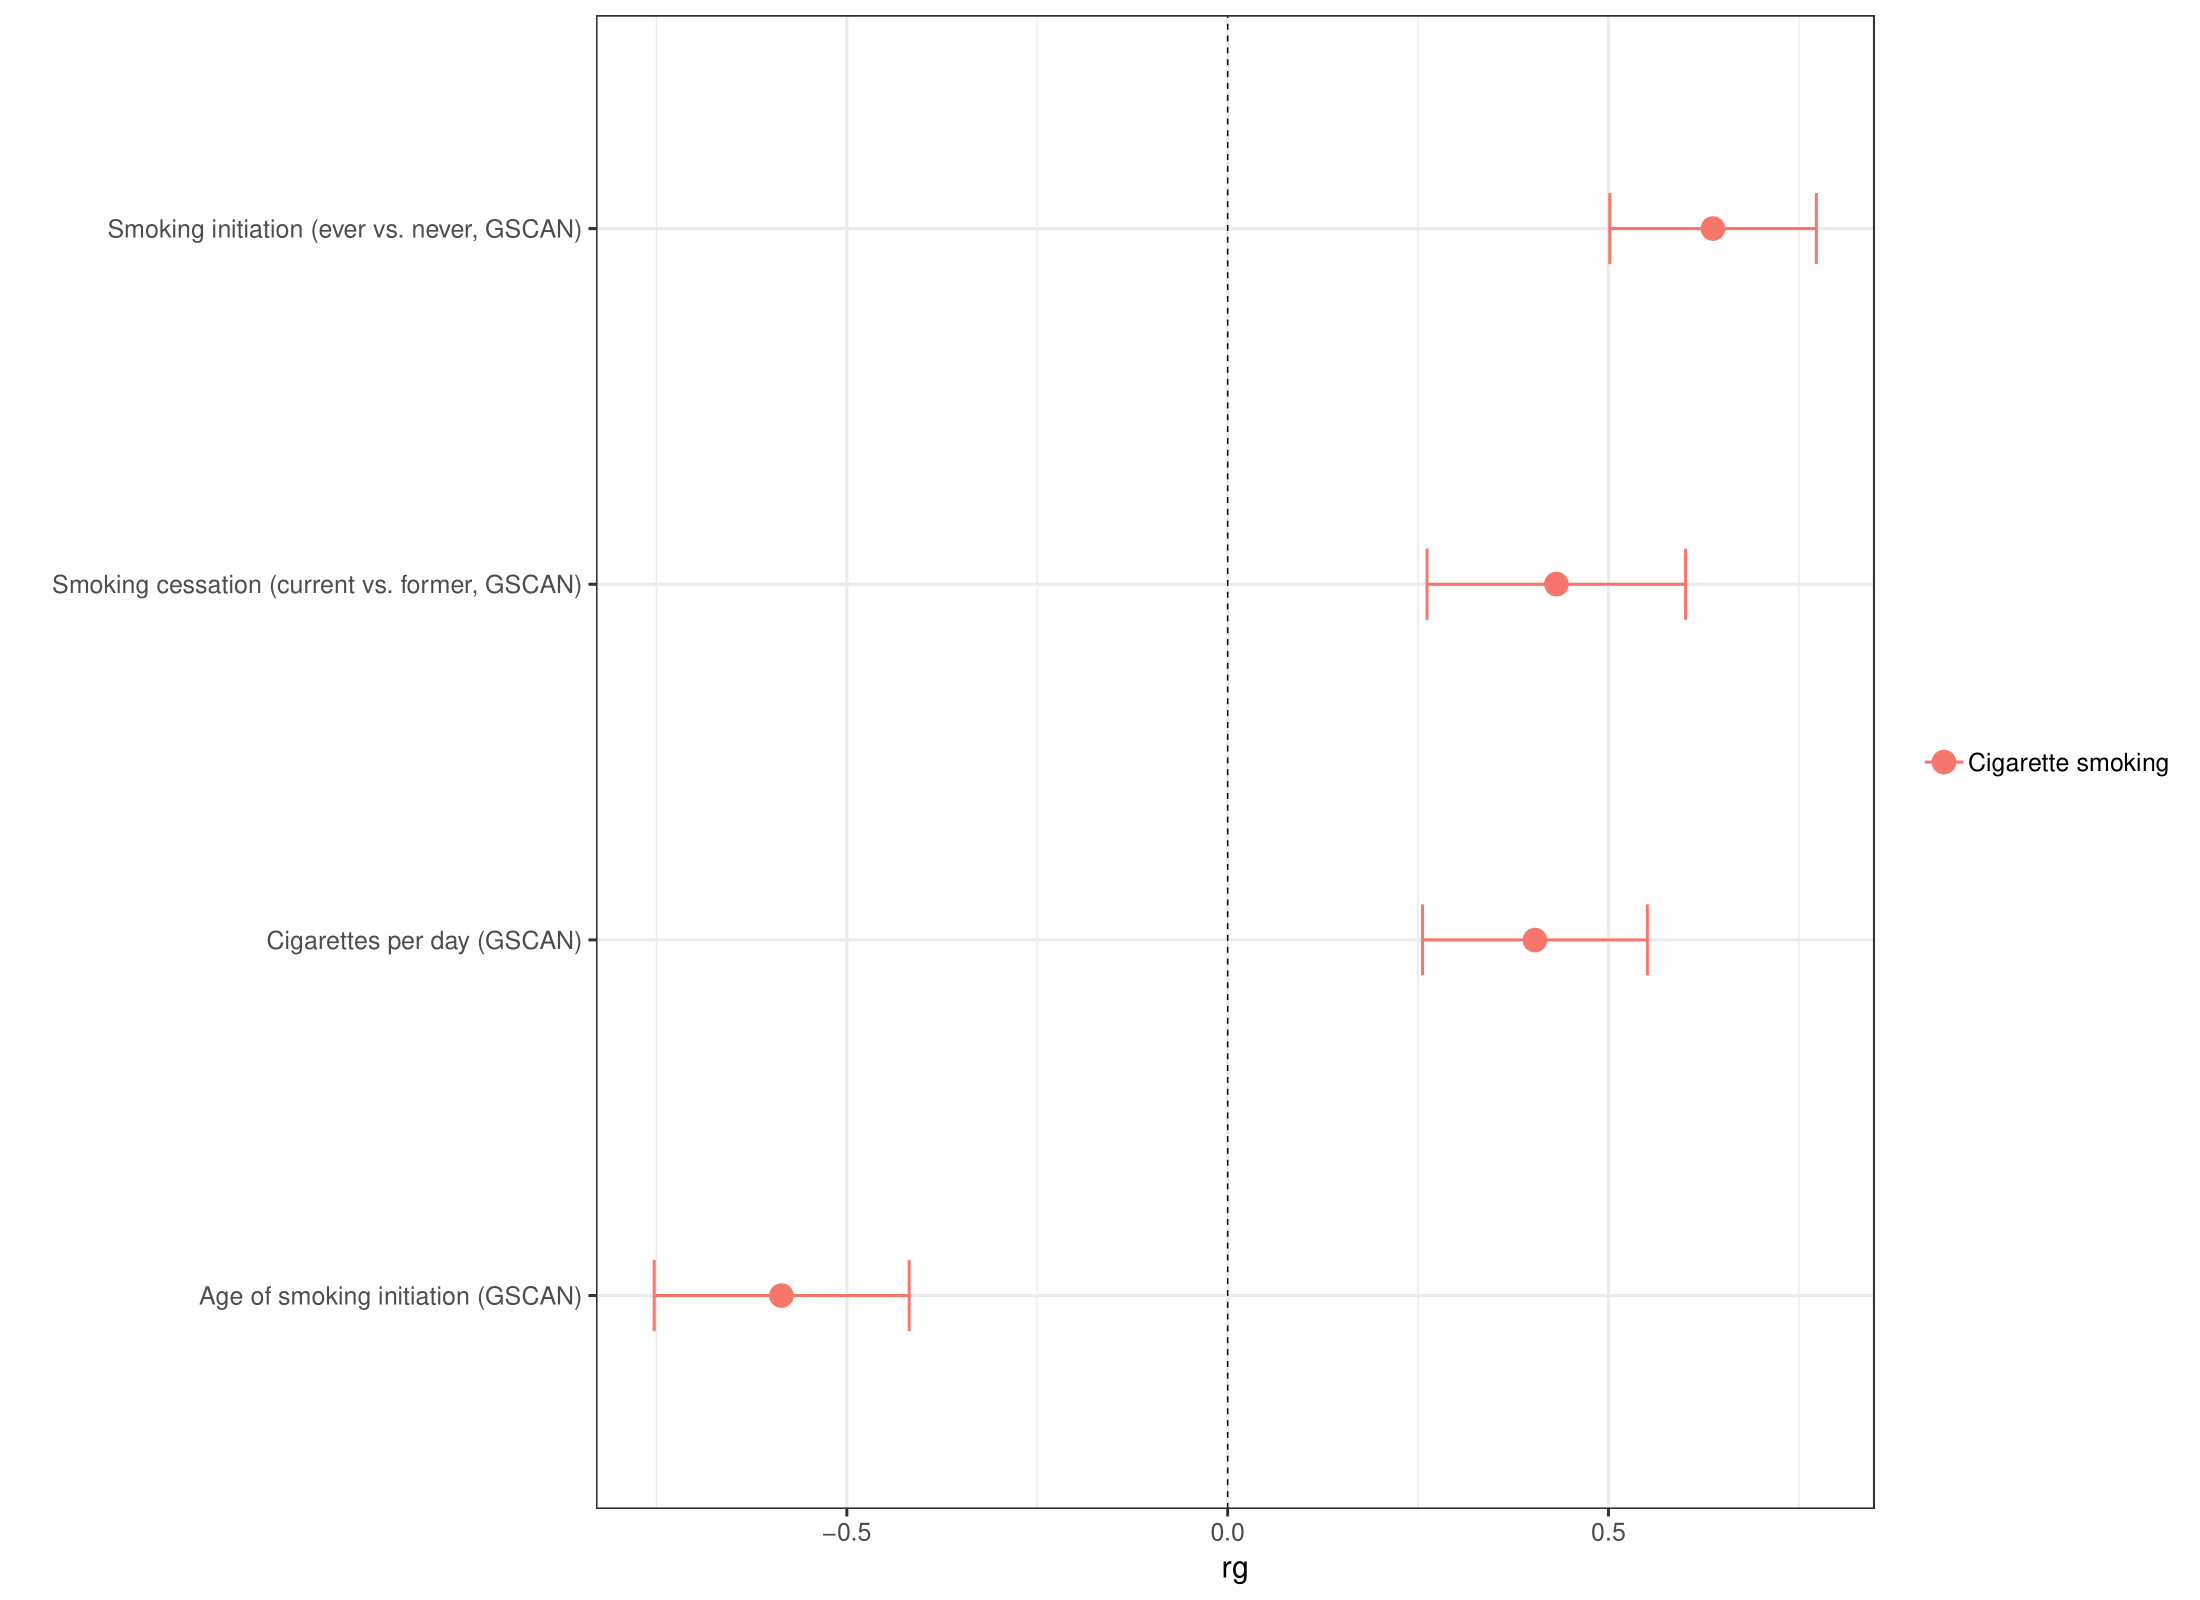

In [4]:
from IPython.display import Image
Image("C://Users/jmarks/OneDrive - Research Triangle Institute/Projects//heroin/ldsc/004/plot/oaall_test.ld_regression_results-1.png")

## OAexp vs GSCAN (005)

In [ ]:
### EC2 ###
## clone ldsc github repo ##
# enter compute node and use screen tool
screen 
qrsh -l h=ip-172-31-17-75

# clone github repo
cd /shared/jmarks/proj/heroin/ldsc/005
git clone https://github.com/RTIInternational/ld-regression-pipeline
    
# edit file-input json
cd ld-regression-pipeline
mkdir workflow_inputs
cp json_input/full_ld_regression_wf_template.json workflow_inputs
cd workflow_inputs

## vim edit file (see README.md at https://github.com/RTIInternational/ld-regression-pipeline)

In [ ]:
### local ###

## edit phenotype file and upload to EC2 instance
scp -i ~/.ssh/gwas_rsa *xlsx ec2-user@3.221.213.211:/shared/jmarks/projects/nicotine/ldsc/005/ld-regression-pipeline/workflow_inputs

In [ ]:
### EC2 ###

# create final workflow input (a json file)
docker run -v /shared/jmarks/proj/heroin/ldsc/005/ld-regression-pipeline/workflow_inputs:/data/ \
    rticode/generate_ld_regression_input_json:1ddbd682cb1e44dab6d11ee571add34bd1d06e21 \
    --json-input /data/full_ld_regression_wf_template.json \
    --pheno-file /data/20190814_opioid_ldsc_phenotypes_local.xlsx >\
        /shared/jmarks/proj/heroin/ldsc/005/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json

### Run Analysis Workflow
Note that I `qrsh` into a compute node—r5.xlarge—when I run the workflow. It is important to enter screen so that if something happens to the terminal window during the processing the workflow will continue to run.

In [ ]:
### EC2 ###

## zip appropriate files 
# Change to directory immediately above ld-regression-pipeline
cd /shared/jmarks/proj/heroin/ldsc/005/ld-regression-pipeline
cd ..
# Make zipped copy of repo somewhere
zip --exclude=*var/* --exclude=*.git/* -r \
    /shared/jmarks/proj/heroin/ldsc/005/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip \
    ld-regression-pipeline

## download cromwell and the config file, if necessary
cd /shared/jmarks/bin/cromwell
#aws s3 cp s3://rti-cromwell-output/cromwell-config/cromwell_default_genomics_queue.conf .
#wget https://github.com/broadinstitute/cromwell/releases/download/44/cromwell-44.jar

## run ldsc workflow on AWS EC2 instance
java -Dconfig.file=/shared/jmarks/bin/cromwell/cromwell_default_genomics_queue.conf \
    -jar cromwell-44.jar \
    run /shared/jmarks/proj/heroin/ldsc/005/ld-regression-pipeline/workflow/full_ld_regression_wf.wdl \
    -i /shared/jmarks/proj/heroin/ldsc/005/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json \
    -p /shared/jmarks/proj/heroin/ldsc/005/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip

### Copy Workflow Results to Local


In [ ]:
scp -r -i ~/.ssh/gwas_rsa ec2-user@54.84.72.140:/shared/jmarks/proj/heroin/ldsc/005/ld-regression-pipeline/workflow_inputs .

### View Plot

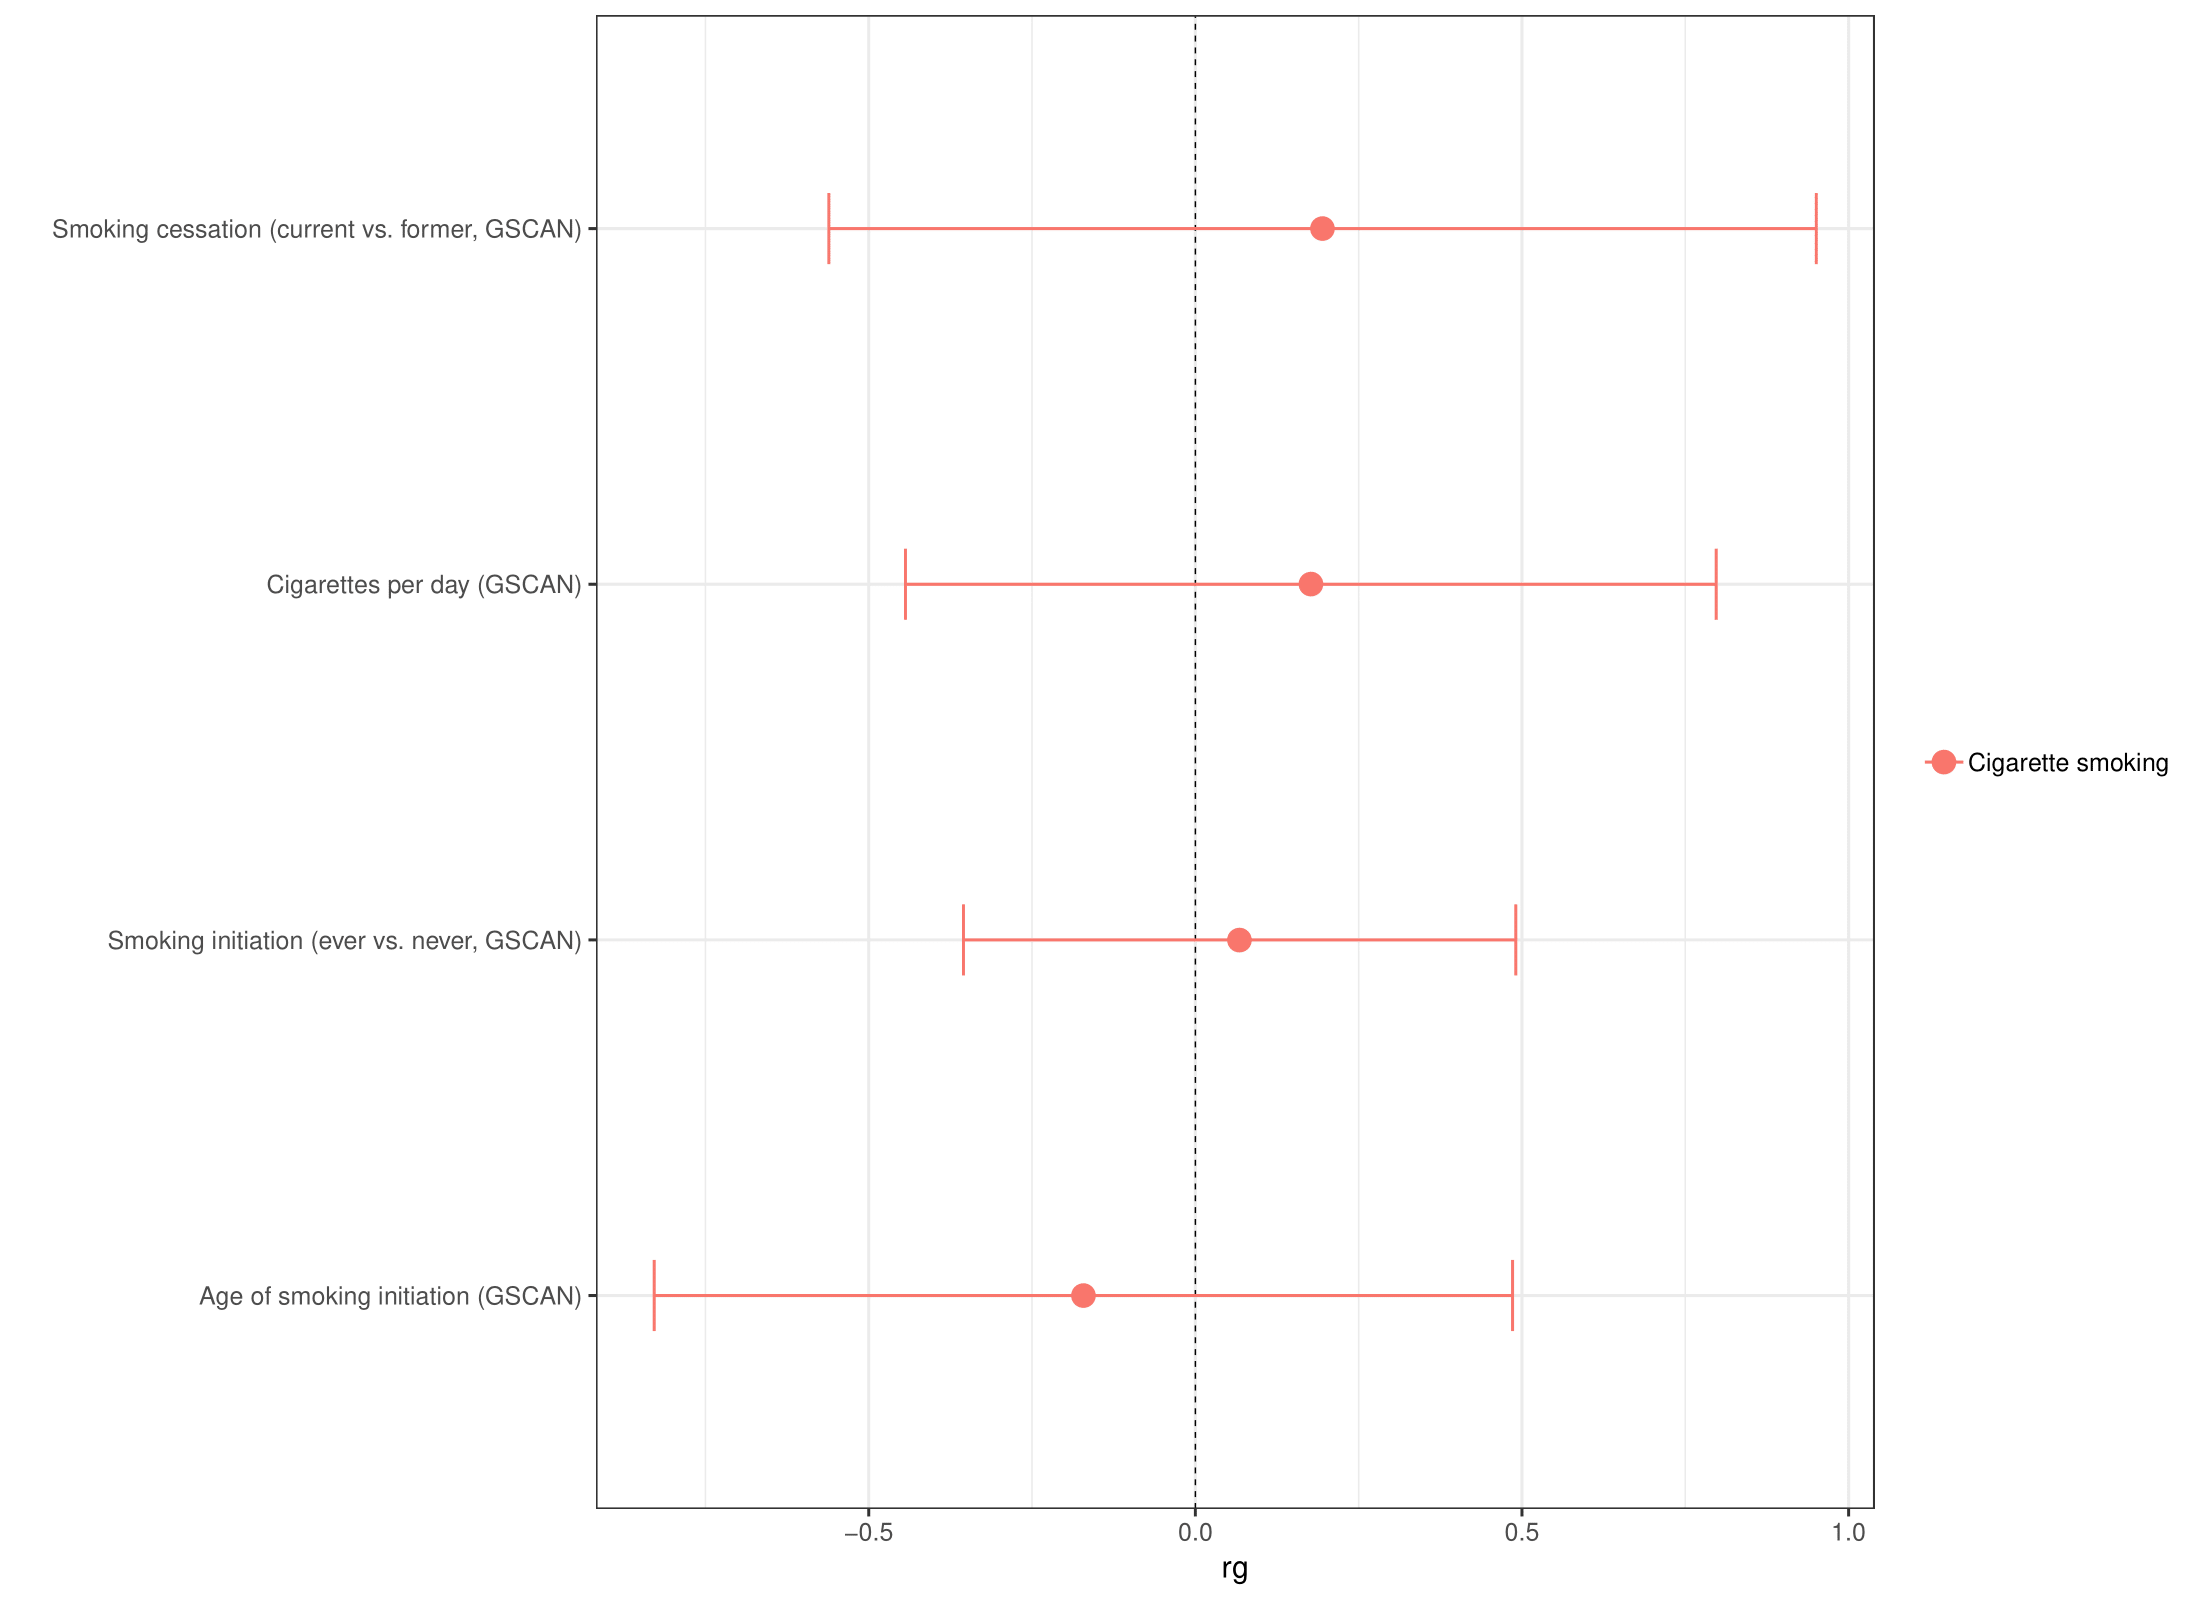

In [5]:
from IPython.display import Image
Image("C://Users/jmarks/OneDrive - Research Triangle Institute/Projects//heroin/ldsc/005/plot/oaexp_test.ld_regression_results-1.png")

## FOU vs GSCAN (006)

In [ ]:
### EC2 ###
## clone ldsc github repo ##
# enter compute node and use screen tool
screen 
qrsh -l h=ip-172-31-17-75

# clone github repo
cd /shared/jmarks/proj/heroin/ldsc/006
git clone https://github.com/RTIInternational/ld-regression-pipeline
    
# edit file-input json
cd ld-regression-pipeline
mkdir workflow_inputs
cp json_input/full_ld_regression_wf_template.json workflow_inputs
cd workflow_inputs

## vim edit file (see README.md at https://github.com/RTIInternational/ld-regression-pipeline)

In [ ]:
### local ###

## edit phenotype file and upload to EC2 instance
scp -i ~/.ssh/gwas_rsa *xlsx ec2-user@3.221.213.211:/shared/jmarks/projects/nicotine/ldsc/006/ld-regression-pipeline/workflow_inputs

In [ ]:
### EC2 ###

# create final workflow input (a json file)
docker run -v /shared/jmarks/proj/heroin/ldsc/006/ld-regression-pipeline/workflow_inputs:/data/ \
    rticode/generate_ld_regression_input_json:1ddbd682cb1e44dab6d11ee571add34bd1d06e21 \
    --json-input /data/full_ld_regression_wf_template.json \
    --pheno-file /data/20190814_opioid_ldsc_phenotypes_local.xlsx >\
        /shared/jmarks/proj/heroin/ldsc/006/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json

### Run Analysis Workflow
Note that I `qrsh` into a compute node—r5.xlarge—when I run the workflow. It is important to enter screen so that if something happens to the terminal window during the processing the workflow will continue to run.

In [ ]:
### EC2 ###

## zip appropriate files 
# Change to directory immediately above ld-regression-pipeline
cd /shared/jmarks/proj/heroin/ldsc/006/ld-regression-pipeline
cd ..
# Make zipped copy of repo somewhere
zip --exclude=*var/* --exclude=*.git/* -r \
    /shared/jmarks/proj/heroin/ldsc/006/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip \
    ld-regression-pipeline

## download cromwell and the config file, if necessary
cd /shared/jmarks/bin/cromwell
#aws s3 cp s3://rti-cromwell-output/cromwell-config/cromwell_default_genomics_queue.conf .
#wget https://github.com/broadinstitute/cromwell/releases/download/44/cromwell-44.jar

## run ldsc workflow on AWS EC2 instance
java -Dconfig.file=/shared/jmarks/bin/cromwell/cromwell_default_genomics_queue.conf \
    -jar cromwell-44.jar \
    run /shared/jmarks/proj/heroin/ldsc/006/ld-regression-pipeline/workflow/full_ld_regression_wf.wdl \
    -i /shared/jmarks/proj/heroin/ldsc/006/ld-regression-pipeline/workflow_inputs/final_wf_inputs.json \
    -p /shared/jmarks/proj/heroin/ldsc/006/ld-regression-pipeline/workflow_inputs/ld-regression-pipeline.zip

### Copy Workflow Results to Local


In [ ]:
scp -r -i ~/.ssh/gwas_rsa ec2-user@54.84.72.140:/shared/jmarks/proj/heroin/ldsc/006/ld-regression-pipeline/workflow_inputs .

### View Plot

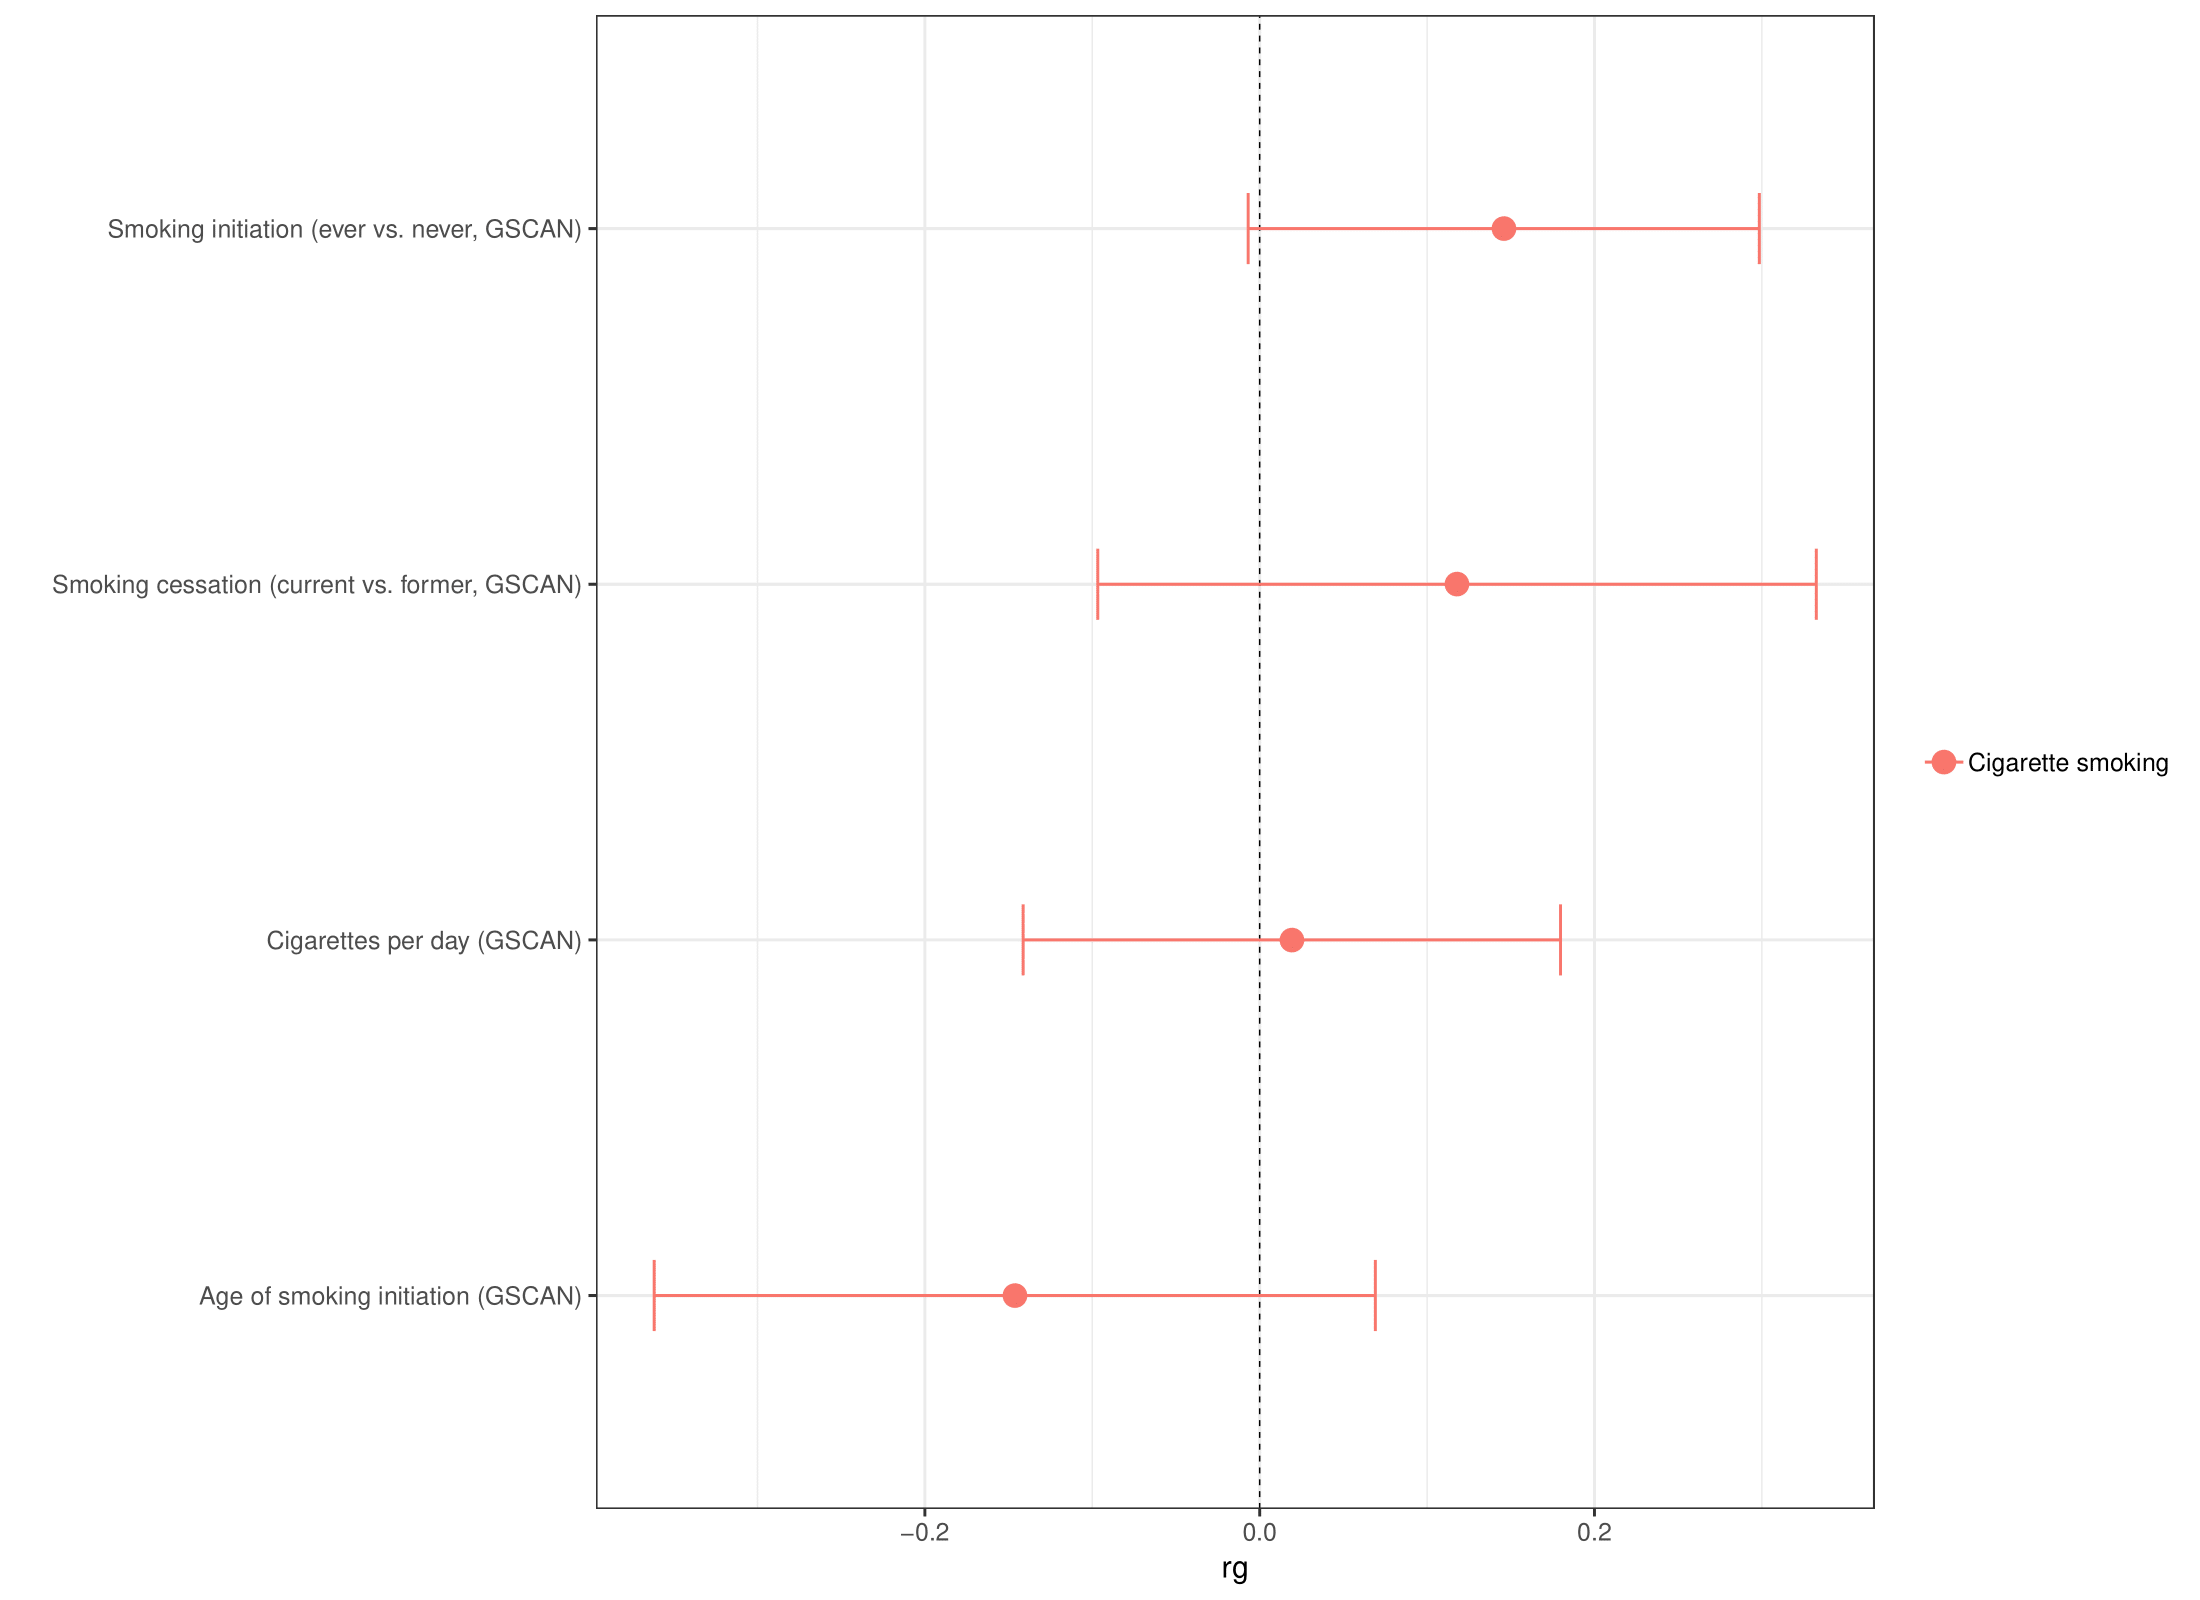

In [6]:
from IPython.display import Image
Image("C://Users/jmarks/OneDrive - Research Triangle Institute/Projects//heroin/ldsc/006/plot/fou_test.ld_regression_results-1.png")